# Predict Prices of Vehicles

<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('uncleaned-data.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Sample size

In [3]:
len(df)

205

<hr>

## Data Wrangling

In [4]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

**Since the data is not in the form to work with it so doing the data wrangling process.**

In [5]:
# Replacing '?' with NaN
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Looking at amount of data missing for columns with missing data**

In [7]:
missing_data_df = df.isnull()
missing_data_columns = missing_data_df.columns.tolist()
for column in missing_data_columns:
    print(column)
    print(missing_data_df[column].value_counts())
    print()

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

#### Missing data info

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

In [8]:
# Droping 'price' rows with missing values since it our target variable
df = df[df.price.notnull()]

price_df = df[['price']]
price_df = price_df.astype('float')

len(df) # Sample size

201

In [9]:
# Replacing 'normalized-losses' missing values with average value of that column

avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0) 
print(f'Average of normalized-losses: {avg_norm_loss}')

df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

Average of normalized-losses: 122.0


In [10]:
# Finding the value that occurs the most
print(df['num-of-doors'].value_counts().idxmax())

# Replacing missing values of 'num-of-doors' with value which 
# appears most in this column i.e. 'four'
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

four


In [11]:
# Replacing 'bore' missing values with average values of that column

avg_bore = df.bore.astype('float').mean(axis=0)
print(f'Average of bore: {avg_bore}')

df.bore.replace(np.nan, avg_bore, inplace=True)

Average of bore: 3.330710659898477


In [12]:
# Replacing 'stroke' missing values with average values of that column
avg_stroke = df.stroke.astype('float').mean(axis=0)
print(f'Average of storke: {avg_stroke}')

df.stroke.replace(np.nan, avg_stroke, inplace=True)

Average of storke: 3.256903553299492


In [13]:
# Replacing 'stroke' missing values with average values of that column
avg_hp = df.horsepower.astype('float').mean(axis=0)
print(f'Average of horsepower: {avg_hp}')

df.horsepower.replace(np.nan, avg_hp, inplace=True)

Average of horsepower: 103.39698492462311


In [14]:
# Replacing 'peak-rpm' missing values with average values of that column
avg_pr = df['peak-rpm'].astype('float').mean(axis=0)
print(f'Average of peak-rpm: {avg_pr}')

df['peak-rpm'].replace(np.nan, avg_pr, inplace=True)

Average of peak-rpm: 5117.587939698493


In [15]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#### Correcting the data format

In [17]:
for column in df.columns.values:
    try:
        df[f'{column}'] = df[f'{column}'].astype('float')
    except ValueError:
        continue

df.dtypes

symboling            float64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

#### Scaling the data 

In [18]:
from sklearn.preprocessing import StandardScaler

for column in df.columns.values:
    if df[f'{column}'].dtype == 'float':
        df[f'{column}'] = StandardScaler().fit_transform(df[f'{column}'].values.reshape(-1, 1))

<hr>

## Exploratory Data Analysis

### Numerical Data

#### symboling

Pearson Coefficient: -0.08239118716962354
P-value: 0.2449148765716521


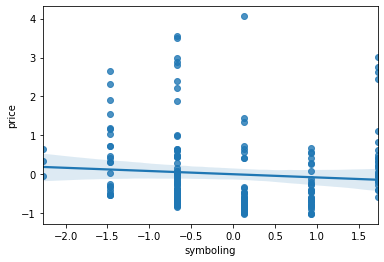

In [19]:
sns.regplot(x='symboling', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['symboling'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### normalized-losses

Pearson Coefficient: 0.13399873429274342
P-value: 0.0578974935270321


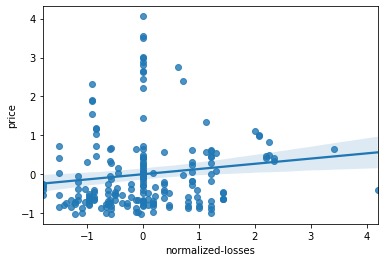

In [20]:
sns.regplot(x='normalized-losses', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['normalized-losses'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### wheel-base

Pearson Coefficient: 0.584641822265508
P-value: 0.0000000000000000


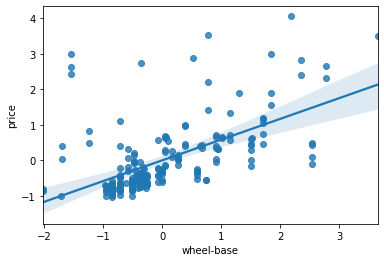

In [21]:
sns.regplot(x='wheel-base', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### length | width | height

Length:
Pearson Coefficient: 0.6906283804483638
P-value: 0.0000000000000000

Width:
Pearson Coefficient: 0.7512653440522674
P-value: 0.0000000000000000

Height:
Pearson Coefficient: 0.13548630756805977
P-value: 0.0551462732510118

Length and Width:
Pearson Coefficient: 0.8571703218913003
P-value: 0.0000000000000000

Width and Height:
Pearson Coefficient: 0.3060021617034483
P-value: 0.0000099753242770

Height and Length:
Pearson Coefficient: 0.4920625494156023
P-value: 0.0000000000001184


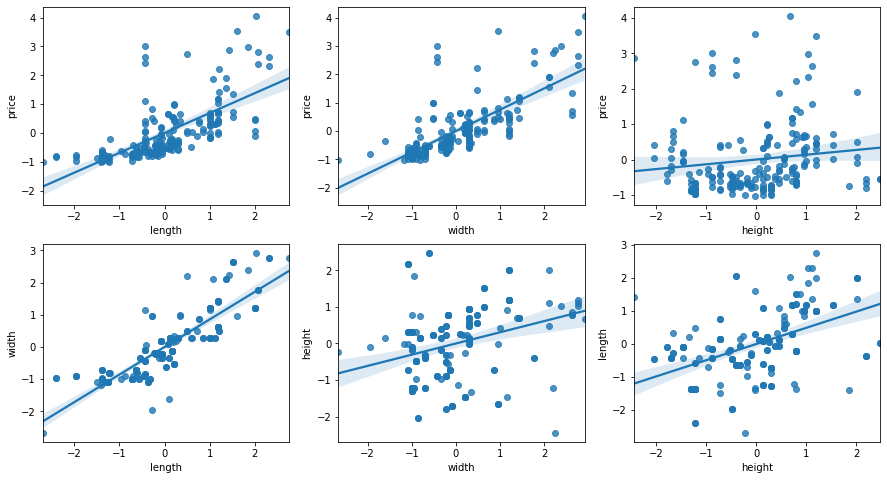

In [22]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

sns.regplot(x='length', y='price', data=df, ax=ax[0, 0])
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print('Length:')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

print()

sns.regplot(x='width', y='price', data=df, ax=ax[0, 1])
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print('Width:')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

print()

sns.regplot(x='height', y='price', data=df, ax=ax[0, 2])
pearson_coef, p_value = stats.pearsonr(df['height'], df['price'])
print('Height:')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

print()

sns.regplot(x='length', y='width', data=df, ax=ax[1, 0])
pearson_coef, p_value = stats.pearsonr(df['length'], df['width'])
print('Length and Width:')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

print()

sns.regplot(x='width', y='height', data=df, ax=ax[1, 1])
pearson_coef, p_value = stats.pearsonr(df['width'], df['height'])
print('Width and Height:')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

print()

sns.regplot(x='height', y='length', data=df, ax=ax[1, 2])
pearson_coef, p_value = stats.pearsonr(df['height'], df['length'])
print('Height and Length:')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

In [23]:
# Since length, width and height are all correlated
df.drop(['width', 'height'], axis='columns', inplace=True)

#### curb-weight

Pearson Coefficient: 0.8344145257702843
P-value: 0.0000000000000000


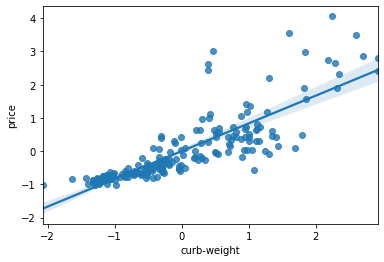

In [24]:
sns.regplot(x='curb-weight', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### engine-size

Pearson Coefficient: 0.8723351674455183
P-value: 0.0000000000000000


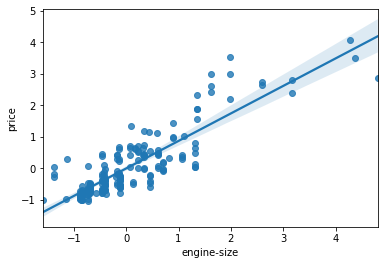

In [25]:
sns.regplot(x='engine-size', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### bore

Pearson Coefficient: 0.5431537659807734
P-value: 0.0000000000000001


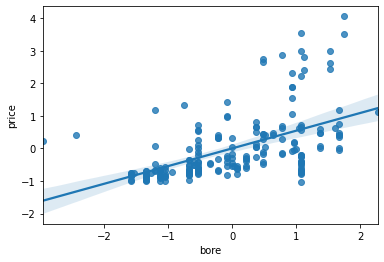

In [26]:
sns.regplot(x='bore', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### stroke

Pearson Coefficient: 0.08226709992212353
P-value: 0.2456287282114257


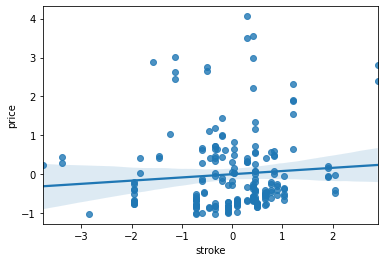

In [27]:
sns.regplot(x='stroke', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['stroke'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

# Since p-value is > 0.05 and < 0.1 therefore stroke is weakly correlated to price
df.drop(['stroke'], axis='columns', inplace=True)

#### compression-ratio

Pearson Coefficient: 0.07110732668194142
P-value: 0.3158110188729282


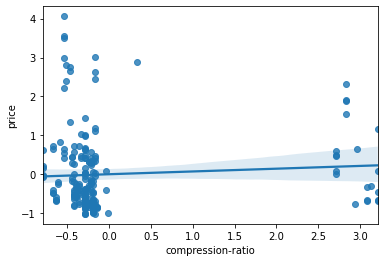

In [28]:
sns.regplot(x='compression-ratio', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['compression-ratio'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

df.drop(['compression-ratio'], axis='columns', inplace=True)

#### horsepower

Pearson Coefficient: 0.8096811975632288
P-value: 0.0000000000000000


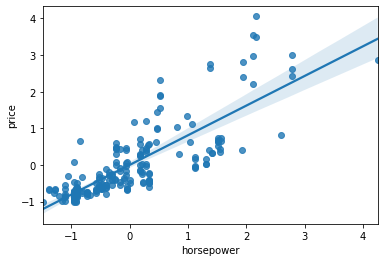

In [29]:
sns.regplot(x='horsepower', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### peak-rpm

Pearson Coefficient: -0.10154203145050203
P-value: 0.1514757570743026


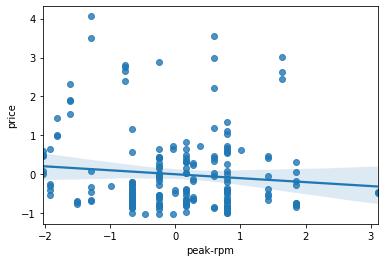

In [30]:
sns.regplot(x='peak-rpm', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['peak-rpm'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

df.drop(['peak-rpm'], axis='columns', inplace=True)

#### city-mpg

Pearson Coefficient: -0.6865710067844678
P-value: 0.0000000000000000


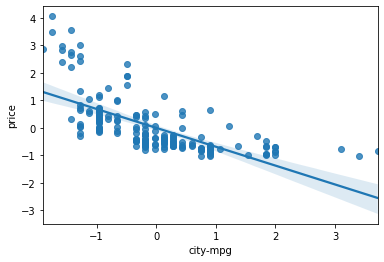

In [31]:
sns.regplot(x='city-mpg', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### highway-mpg

Pearson Coefficient: -0.7046922650589529
P-value: 0.0000000000000000


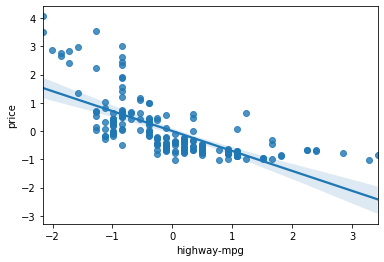

In [32]:
sns.regplot(x='highway-mpg', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### Using Pearson Correlation

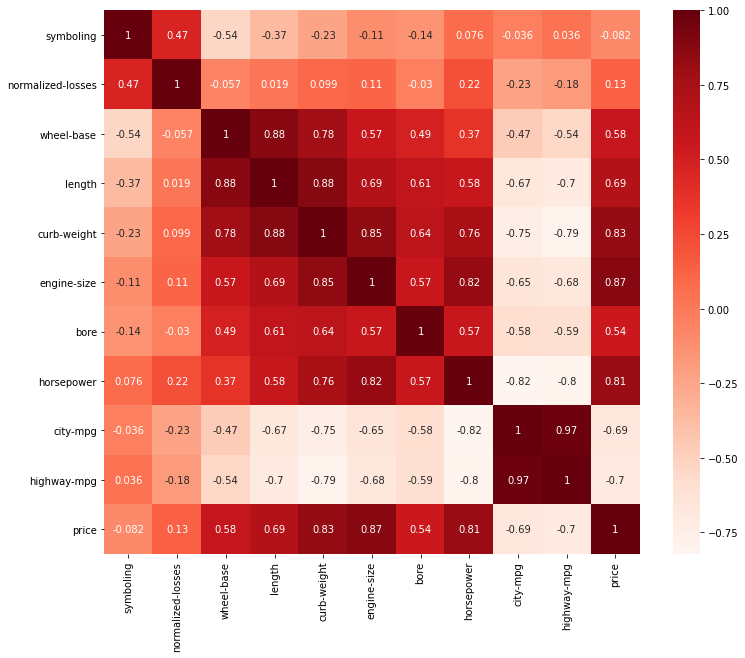

In [33]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### length | engine-size | wheel-base

Pearson Coefficient: 0.8806647862654423
P-value: 0.0000000000000000

Pearson Coefficient: 0.8490716606415305
P-value: 0.0000000000000000

Pearson Coefficient: 0.7820972444156646
P-value: 0.0000000000000000


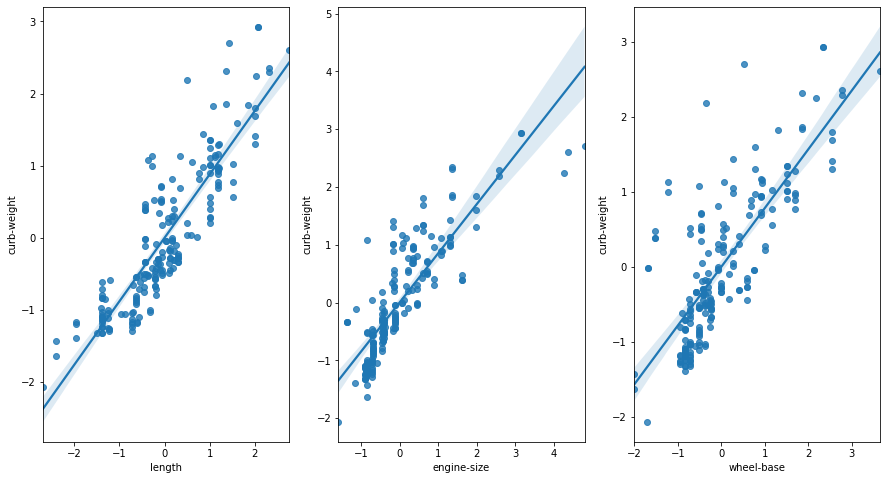

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

sns.regplot(x='length', y='curb-weight', data=df, ax=ax1)
pearson_coef, p_value = stats.pearsonr(df['length'], df['curb-weight'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

print()

sns.regplot(x='engine-size', y='curb-weight', data=df, ax=ax2)
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['curb-weight'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

print()

sns.regplot(x='wheel-base', y='curb-weight', data=df, ax=ax3)
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['curb-weight'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

df.drop(['length'], axis='columns', inplace=True)
df.drop(['engine-size'], axis='columns', inplace=True)
df.drop(['wheel-base'], axis='columns', inplace=True)

#### city-mpg | highway-mpg

Pearson Coefficient: 0.9720437058960097
P-value: 0.0000000000000000


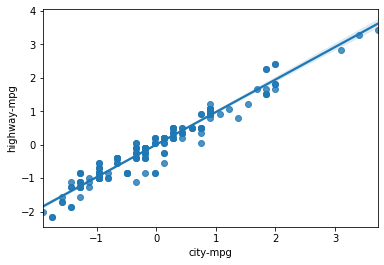

In [35]:
sns.regplot(x='city-mpg', y='highway-mpg', data=df)

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['highway-mpg'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

df.drop(['city-mpg'], axis='columns', inplace=True)

#### curb-weight | horsepower

Pearson Coefficient: 0.7579936714773606
P-value: 0.0000000000000000


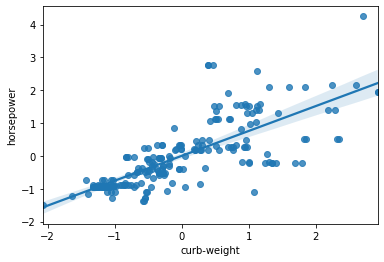

In [36]:
sns.regplot(x='curb-weight', y='horsepower', data=df)

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['horsepower'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

df.drop(['horsepower'], axis='columns', inplace=True)

#### highway-mpg

Pearson Coefficient: -0.7046922650589529
P-value: 0.0000000000000000


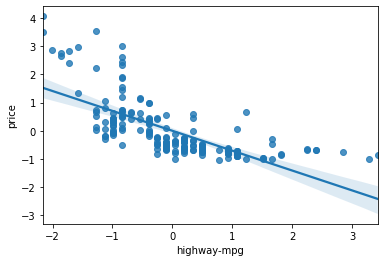

In [37]:
sns.regplot(x='highway-mpg', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### bore | curb-weight

Pearson Coefficient: 0.6440405766378415
P-value: 0.0000000000000000


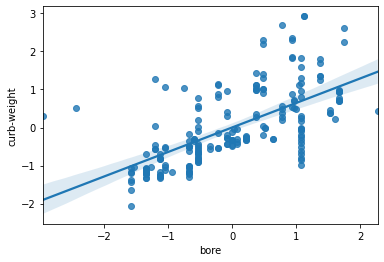

In [38]:
sns.regplot(x='bore', y='curb-weight', data=df)

pearson_coef, p_value = stats.pearsonr(df['bore'], df['curb-weight'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

df.drop(['bore'], axis='columns', inplace=True)

#### Using Pearson Correlation

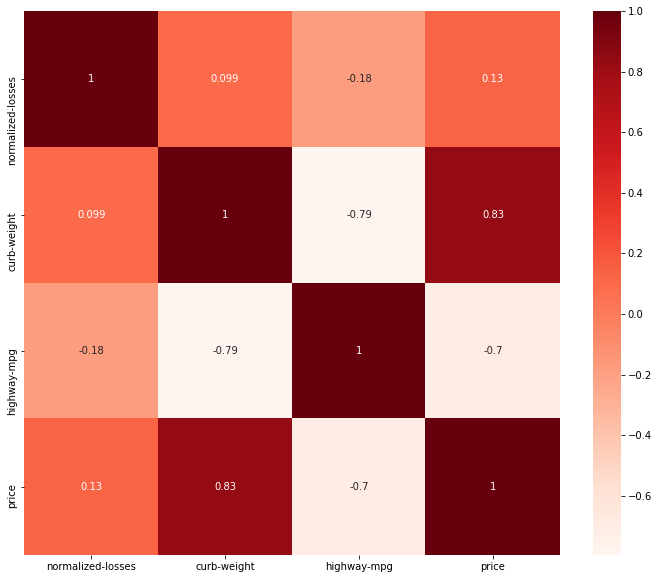

In [40]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [41]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,fuel-system,highway-mpg,price
0,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-0.014858,dohc,four,mpfi,-0.542288,0.036314
1,0.000000,alfa-romero,gas,std,two,convertible,rwd,front,-0.014858,dohc,four,mpfi,-0.542288,0.415385
2,0.000000,alfa-romero,gas,std,two,hatchback,rwd,front,0.518080,ohcv,six,mpfi,-0.689386,0.415385
3,1.315931,audi,gas,std,four,sedan,fwd,front,-0.423766,ohc,four,mpfi,-0.100993,0.093711
4,1.315931,audi,gas,std,four,sedan,4wd,front,0.520017,ohc,five,mpfi,-1.277779,0.535224


<hr>

### Categorical Data

In [42]:
cat_df = df.select_dtypes(include='object')
idx = cat_df.index
price_df = price_df.loc[idx]
cat_df = pd.concat([cat_df, price_df], axis='columns')
cat_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


In [43]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              201 non-null    object 
 1   fuel-type         201 non-null    object 
 2   aspiration        201 non-null    object 
 3   num-of-doors      201 non-null    object 
 4   body-style        201 non-null    object 
 5   drive-wheels      201 non-null    object 
 6   engine-location   201 non-null    object 
 7   engine-type       201 non-null    object 
 8   num-of-cylinders  201 non-null    object 
 9   fuel-system       201 non-null    object 
 10  price             201 non-null    float64
dtypes: float64(1), object(10)
memory usage: 28.8+ KB


#### make

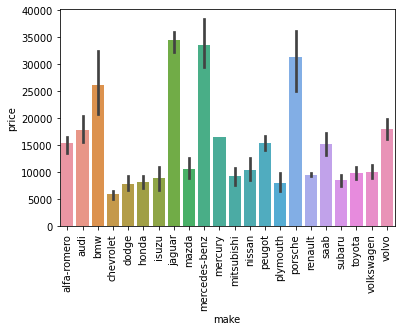

In [44]:
sns.barplot(x='make', y='price', data=cat_df)
plt.xticks(rotation=90)

replacement = {
    'chevrolet': 0,
    'plymouth': 1,
    'dodge': 2,
    'honda': 3,
    'subaru': 3,
    'mitsubishi': 4,
    'renault': 5,
    'isuzu': 5,
    'toyota': 5,
    'volkswagen': 6,
    'nissan': 7,
    'mazda': 8,
    'saab': 9,
    'peugot': 10,
    'alfa-romero': 11,
    'mercury': 12,
    'volvo': 13,
    'audi': 14,
    'bmw': 15,
    'porsche': 16,
    'mercedes-benz': 17,
    'jaguar': 18
}
cat_df.make = cat_df.make.apply(lambda x: replacement[x])

#### fuel-type

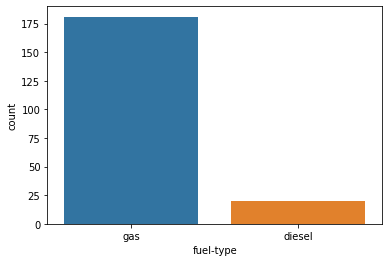

In [45]:
sns.countplot(x='fuel-type', data=cat_df)

replacement = {
    'diesel': 0,
    'gas': 1
}
cat_df['fuel-type'] = cat_df['fuel-type'].apply(lambda x: replacement[x])

#### aspiration

std      165
turbo     36
Name: aspiration, dtype: int64


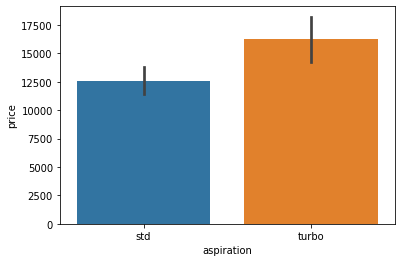

In [46]:
print(cat_df.aspiration.value_counts())
sns.barplot(x='aspiration', y='price', data=cat_df)

replacement = {
    'turbo': 1,
    'std': 0
}
cat_df.aspiration = cat_df.aspiration.apply(lambda x: replacement[x])

#### num-of-doors

four    115
two      86
Name: num-of-doors, dtype: int64


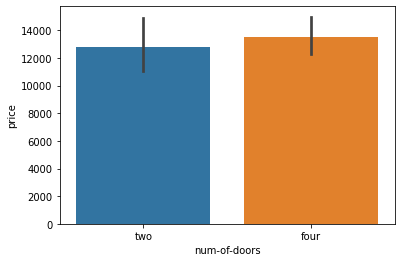

In [47]:
print(cat_df['num-of-doors'].value_counts())
sns.barplot(x='num-of-doors', y='price', data=cat_df)

replacement = {
    'two': 0,
    'four': 1
}
cat_df['num-of-doors'] = cat_df['num-of-doors'].apply(lambda x: replacement[x])

#### body-style

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


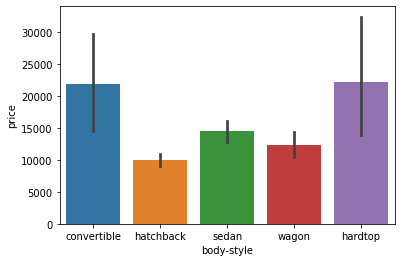

In [48]:
print(cat_df['body-style'].value_counts())
sns.barplot(x='body-style', y='price', data=cat_df)

replacement = {
    'hardtop': 4,
    'convertible': 3,
    'wagon': 1,
    'hatchback': 0,
    'sedan': 2
}
cat_df['body-style'] = cat_df['body-style'].apply(lambda x: replacement[x])

#### drive-wheels

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


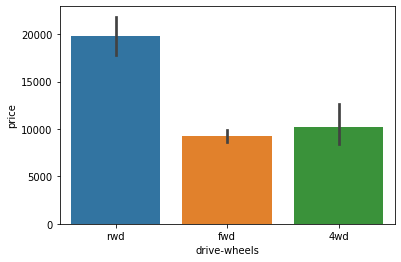

In [49]:
print(cat_df['drive-wheels'].value_counts())
sns.barplot(x='drive-wheels', y='price', data=cat_df)

replacement = {
    '4wd': 1,
    'fwd': 0,
    'rwd': 2
}
cat_df['drive-wheels'] = cat_df['drive-wheels'].apply(lambda x: replacement[x])

#### engine-location

front    198
rear       3
Name: engine-location, dtype: int64


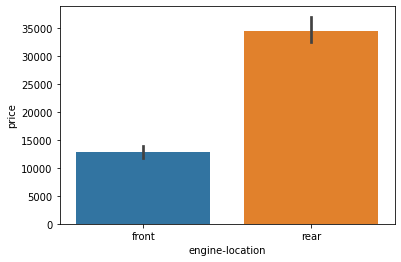

In [50]:
print(cat_df['engine-location'].value_counts())
sns.barplot(x='engine-location', y='price', data=cat_df)

replacement = {
    'front': 0,
    'rear': 1
}
cat_df['engine-location'] = cat_df['engine-location'].apply(lambda x: replacement[x])

#### engine-type

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64


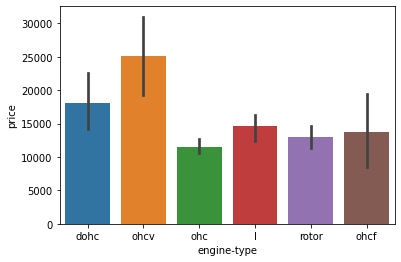

In [51]:
print(cat_df['engine-type'].value_counts())
sns.barplot(x='engine-type', y='price', data=cat_df)

replacement = {
    'ohc': 0,
    'rotor': 1,
    'l': 3,
    'ohcf': 2,
    'dohc': 4,
    'ohcv': 5
}
cat_df['engine-type'] = cat_df['engine-type'].apply(lambda x: replacement[x])

#### nums-of-cylinder

four      157
six        24
five       10
two         4
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64


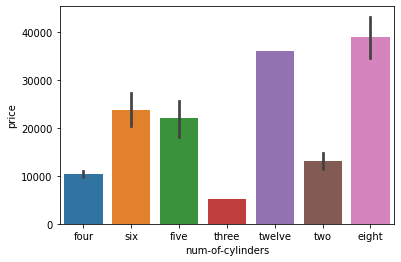

In [52]:
print(cat_df['num-of-cylinders'].value_counts())
sns.barplot(x='num-of-cylinders', y='price', data=cat_df)

replacement = {
    'three': 0,
    'four': 1,
    'two': 2,
    'five': 3,
    'six': 4,
    'twelve': 5,
    'eight': 6
}
cat_df['num-of-cylinders'] = cat_df['num-of-cylinders'].apply(lambda x: replacement[x])

#### fuel-system

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64


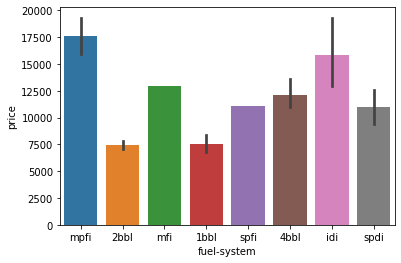

In [53]:
print(cat_df['fuel-system'].value_counts())
sns.barplot(x='fuel-system', y='price', data=cat_df)

replacement = {
    '2bbl': 0,
    '1bbl': 0,
    'spdi': 3,
    'spfi': 2,
    '4bbl': 4,
    'mfi': 5,
    'idi': 6, 
    'mpfi': 7
}
cat_df['fuel-system'] = cat_df['fuel-system'].apply(lambda x: replacement[x])

<hr>

## Combining numercical and categorical features

In [54]:
cat_df.drop(['price'], axis='columns', inplace=True)

In [55]:
df.drop(cat_df.columns.tolist(), axis='columns', inplace=True)

In [56]:
df = pd.concat([df, cat_df], axis='columns')
df = df.sample(frac=1)
df.head()

,normalized-losses,curb-weight,highway-mpg,price,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
202,-0.845956,0.884353,-1.130681,1.044227,13,1,0,1,2,2,0,5,4,7
127,0.000000,0.388237,-0.836484,2.626486,16,1,0,0,4,2,1,2,4,7
85,0.093995,-0.369503,0.193204,-0.784397,4,1,0,1,2,0,0,0,1,0
117,1.221936,1.113031,-0.983583,0.623527,10,1,1,1,2,2,0,3,1,7
60,-0.219322,-0.282295,0.193204,-0.594420,8,1,0,1,2,0,0,0,1,0


In [57]:
columns = df.columns.tolist()
columns.remove('price')
X = np.array(df[columns])
y = np.array(df['price'])

<hr>

## Creating Model

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

#### Splitting the dataset

In [59]:
kf = KFold(n_splits=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#### Cross Validation

In [61]:
score = cross_val_score(Ridge(), X_train, y_train, cv=kf)
score.mean()

0.8535993682437129

#### Parameter Tuning

In [62]:
parameters = {
    'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

gs = GridSearchCV(Ridge(), parameters, scoring='r2', cv=kf)
gs_model = gs.fit(X_train, y_train)
score = cross_val_score(gs_model, X_train, y_train, cv=kf)
score.mean()

0.8486370258165467

In [63]:
gs_model.best_params_

{'alpha': 0.1, 'solver': 'lsqr'}

#### Fitting the model

In [64]:
model = Ridge(alpha=0.1, solver='lsqr')
model.fit(X_train, y_train)

Ridge(alpha=0.1, solver='lsqr')

#### Predictions

In [65]:
y_test_pred = model.predict(X_test)
y_test_pred

array([ 0.85203272,  0.86852503, -0.85615504,  0.20293241, -0.95496518,
       -0.4801895 , -0.71808939, -0.21567475,  0.08504652, -0.74807902,
       -0.65599399, -0.55241966, -0.66123555, -0.87125729,  0.45762105,
       -0.89328692,  1.00667461, -1.02783702,  1.62195393,  0.10091025,
       -0.73516712, -0.95496518,  0.83287003, -0.58810739,  0.92703963,
       -0.57365812, -0.49688437,  0.21955311, -0.79924153, -0.68102148,
       -0.64887271, -0.44807485, -0.54835398,  0.83966987,  2.53573106,
       -0.52140297,  0.39903009, -0.18594382,  0.61126917,  0.94208834,
       -0.18102219, -0.97179085, -0.36165093,  2.87003939, -0.52819819,
        0.53164645,  0.80018623,  0.47934209, -0.39331697, -0.61550161,
        2.79191398, -0.0816762 , -0.63179765, -0.43792309, -0.72511402,
       -0.46174057, -0.65821578, -0.42790128,  0.87962676, -0.45024381,
        0.45762105])

In [66]:
y_test

array([ 1.18803412,  0.31320615, -0.9862319 ,  0.03631396, -0.70618603,
       -0.53727548, -0.70694291, -0.62545209, -0.60022273, -0.58647273,
       -0.67010805, -0.66972961, -0.73898419, -1.02041768,  0.59829789,
       -0.68360575,  0.56802266, -0.80130071,  1.43275889,  0.16170386,
       -0.40961493, -0.82186263,  0.03681854, -0.5502686 ,  0.25770157,
       -0.24713787, -0.97235575, -0.55872044, -0.76711493, -0.65522273,
       -0.65698878, -0.81013098, -0.6268397 ,  0.73642862,  2.40219694,
       -0.68991309,  0.56285064, -0.59441998,  0.45890569,  0.41538505,
       -0.03066999, -0.8487319 , -0.11569292,  2.87524739, -0.4955209 ,
        0.48791945,  0.65758688,  0.08235753, -0.40974108, -0.40608282,
        2.43726575, -0.28536035, -0.79083052, -0.74529153, -0.379592  ,
       -0.68524566, -0.80205759, -0.19087641,  0.6549378 , -0.31651861,
        0.46584377])

#### Evaluating the Model

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# Out of sample prediction
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 0.2959989179526991
R2-score: 0.8748445268487628


In [70]:
# In sample prediction
y_train_pred = model.predict(X_train)
rms_error = mean_squared_error(y_train, y_train_pred, squared=False)
r2_score_value = r2_score(y_train, y_train_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 0.33260610166341575
R2-score: 0.9013643233263808


#### Saving the model

In [71]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']

#### Visualizing our prediction against actual values

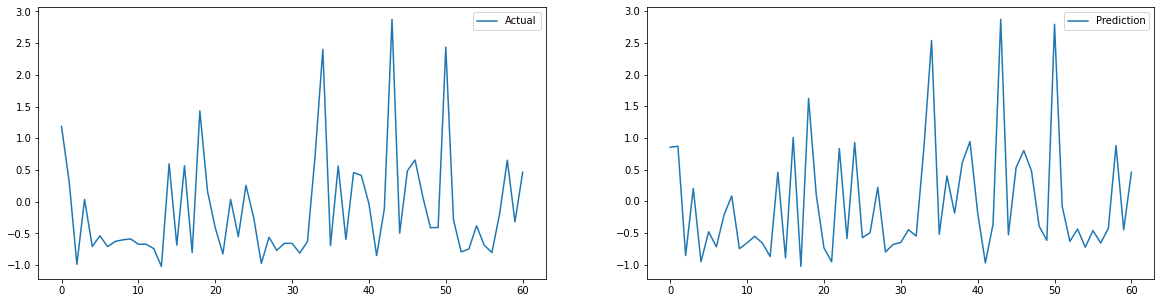

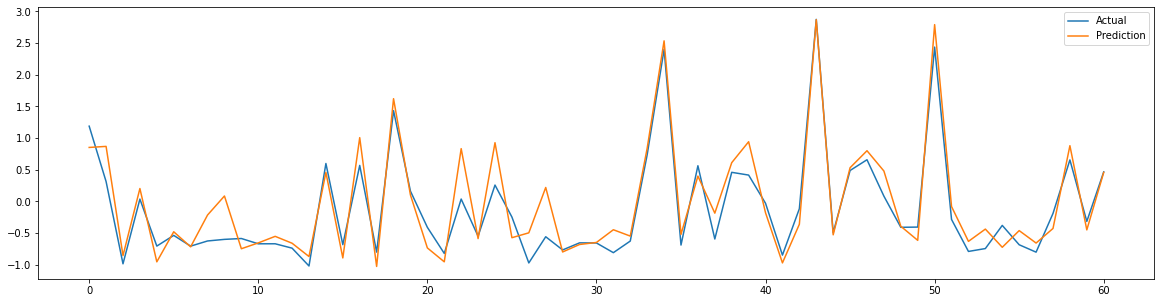

In [72]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax3.legend()

<hr>